In [ ]:
!pip install pandas
!pip install openpyxl
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

## **Parte 1 y 2:** ##
**Apartado 1.- (1 punto)** Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de la librería scikit-learn.

**Apartado 2.- (1 punto)** El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para representar los datos iniciales. Para ello, en primer lugar, habrá que obtener la matriz de covarianza mediante el método cov de Numpy y después aplicarle a dicha matriz el método linalg.eig también de NumPy. Obtén un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica qué quieren decir estos datos. ¿Cuánta información perdemos con 2 componentes? ¿Cuánta información representamos con 3 componentes?

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar el conjunto de datos
data = pd.read_csv('/content/USA.csv',sep=';')

# Separar las variables numéricas
datos_num = data.drop('Ciudad', axis=1)

# Estandarizar los datos
scaler = StandardScaler()
datos_esc = scaler.fit_transform(datos_num)

# Estandarizar los datos
datos_esc = (datos_num - datos_num.mean()) / datos_num.std()

# Calcular la matriz de covarianza
# Rowvar = False, significa que cada columna de la matriz de entrada representa
# una variable y las filas representan observaciones.
matriz_cov = np.cov(datos_esc, rowvar=False)

# Calcular autovectores y autovalores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(matriz_cov)


# Ordenar los autovalores de mayor a menor y sus autovectores correspondientes
indices_ord = np.argsort(eigenvalues)[::-1]
eigenvalues_ord = eigenvalues[indices_ord]
eigenvectors_ord = eigenvectors[:, indices_ord]

# Calcular el porcentaje de varianza explicada
var_exp = eigenvalues_ord / np.sum(eigenvalues_ord)
var_exp_acum = np.cumsum(var_exp)

# Imprimir var_exp y var_exp_acum en columnas
print("Porcentaje de Varianza Explicada  |  Varianza Explicada Acumulada")
print("-" * 60)  # Línea divisoria para mejorar la legibilidad

for v_exp, v_exp_acum in zip(var_exp, var_exp_acum):
    print(f"{v_exp:.4f}                              | {v_exp_acum:.4f}")

# Encontrar el número de componentes principales para alcanzar el umbral del 80%
# que ha sido definido por nosotros.
num_components = np.argmax(var_exp_acum >= 0.8) + 1

# Seleccionar los componentes principales
principal_components = datos_esc.dot(eigenvectors_ord[:, :num_components])

# Crear una tabla que relacione las componentes principales con las variables iniciales
components_df = pd.DataFrame(eigenvectors_ord[:, :num_components], columns=['Componente Principal ' + str(i + 1) for i in range(num_components)], index=datos_num.columns)
print("Tabla de relación entre componentes principales y variables iniciales:")
print(components_df)

Porcentaje de Varianza Explicada  |  Varianza Explicada Acumulada
------------------------------------------------------------
0.3897                              | 0.3897
0.2160                              | 0.6058
0.1993                              | 0.8051
0.1274                              | 0.9325
0.0495                              | 0.9820
0.0143                              | 0.9964
0.0036                              | 1.0000
Tabla de relación entre componentes principales y variables iniciales:
           Componente Principal 1  Componente Principal 2  \
SO2                      0.489699                0.084576   
Neg.Temp                -0.315371               -0.088638   
Empresas                 0.541169               -0.225881   
Poblacion                0.487588               -0.282004   
Viento                   0.249875                0.055471   
Precip                   0.000187                0.625879   
Dias                     0.260179                0.677967   

La varianza explicada muestra cuánta variabilidad total en los datos es explicada por cada componente principal.      
La varianza explicada acumulada muestra cuánta varianza se explica al considerar cada componente principal en orden.         
**¿Cuánta información perdemos con 2 componentes?**
Sin 2 componentes, tenemos el 60,58% de la información y por tanto perdemos el 39,42% de la información.

**¿Cuánta información representamos con 3 componentes?**
Con 3 componentes representamos el 80,51% de la información

Para seleccionar las componentes, vamos a utilizar el criterio de la varianza explicada. Este criterio se basa en seleccionar el número mínimo de componentes principales necesarias para alcanzar o superar el umbral de porcentaje de varianza explicada acumulada deseado. Nosotros fijaremos nuestro umbral en 80% y por tanto nos quedaremos con 3 de las 7 componentes principales para el PCA, SO2, Precipitación y Días y podremos representar los datos a partir de una combinación lineal de las componentes principales.

Tras analizar estas variables y obtener las componentes principales, vamos a analizar lo que representa cada componente principal

**Componente Principal 1:**
- SO2 (Dióxido de azufre): Este componente tiene una carga positiva considerable para SO2, lo que sugiere que las ciudades con valores altos en esta componente tendrán altos niveles de dióxido de azufre. Esto puede estar relacionado con la presencia de industrias o fábricas que emiten SO2.
- Empresas: Hay una carga positiva significativa para el número de empresas. Esto indica que las ciudades con más empresas tienden a tener mayores valores en esta componente principal.
- Población: Similar a las empresas, la población también tiene una carga positiva considerable. Las ciudades más pobladas contribuyen más a esta componente principal.
- Precipitación: Aunque muy pequeño, hay un valor positivo para la precipitación, lo que sugiere una relación leve con esta componente. Puede ser que la precipitación esté ligeramente asociada con esta componente, aunque otras variables tienen una contribución más fuerte.

En resumen, esta componente principal podría estar relacionada con la actividad industrial y la densidad de población en las ciudades, con una influencia leve de la precipitación.

**Componente Principal 2:**
- Neg.Temp (Temperatura Negativa): Esta componente tiene una carga negativa para la temperatura negativa, lo que sugiere que las ciudades con valores más bajos en esta componente principal tendrán temperaturas negativas más altas.
- Precipitación: La carga más alta está en la precipitación, con un valor muy alto y positivo. Esto indica que las ciudades con más precipitación tendrán valores más altos en esta componente principal.
- Días: También hay una carga positiva significativa para los días, lo que sugiere que las ciudades con más días de cierto tipo (por ejemplo, días lluviosos o nevados) contribuyen más a esta componente principal.

En resumen, esta componente principal podría estar relacionada con el clima, particularmente con la cantidad de precipitación y la frecuencia de días lluviosos o nevados.

**Componente Principal 3:**
- Neg.Temp (Temperatura Negativa): Esta componente tiene la carga más alta y negativa para la temperatura negativa. Las ciudades con temperaturas negativas más altas tendrán valores más bajos en esta componente principal.
- Población: Hay una carga negativa significativa para la población, lo que sugiere que las ciudades más pobladas contribuyen menos a esta componente principal.
- Viento: El viento tiene una carga positiva, aunque moderada, lo que indica una relación positiva con esta componente. Las ciudades con vientos más fuertes contribuyen más a esta componente.

En resumen, esta componente principal parece estar relacionada con la temperatura negativa y la densidad de población, con una influencia moderada del viento.

## **Parte 3:** ##
**Apartado 3 .- (1 punto)** Por último queremos representar gráficamente las ciudades de nuestro dataset, pero usando
los valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 3 dimensiones y
comenta qué has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria.
Habrá que interpretar qué información proporciona el eje X, Y y el Z. Por último, elegir al menos 4 ciudades
de forma aleatoria y explicar qué pasa con ellas.

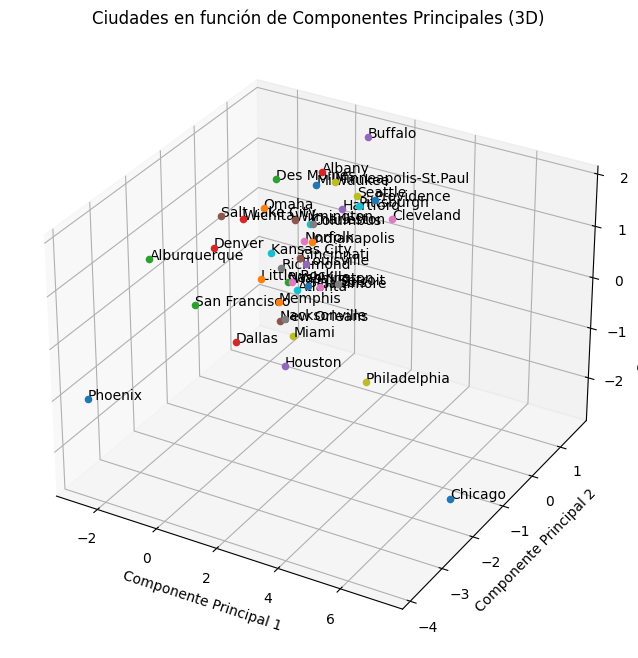

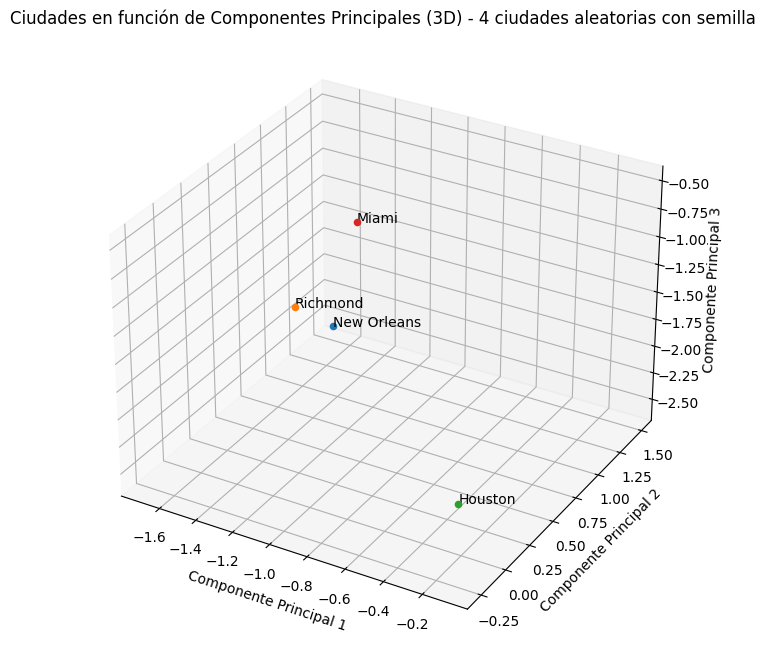

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Graficar las ciudades en función de las componentes principales en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(principal_components)):
    ax.scatter(principal_components.iloc[i, 0], principal_components.iloc[i, 1], principal_components.iloc[i, 2])
    ax.text(principal_components.iloc[i, 0], principal_components.iloc[i, 1], principal_components.iloc[i, 2], data['Ciudad'][i])

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Ciudades en función de Componentes Principales (3D)')
plt.show()


# Ahora elegimos 4 ciudades de forma aleatoria
# Establecer la semilla para hacer los resultados reproducibles
semilla = 3
random.seed(semilla)

# Seleccionar aleatoriamente 4 ciudades con la semilla dada
ciudades_seleccionadas = random.sample(data['Ciudad'].tolist(), 4)

# Filtrar los datos para incluir solo las 4 ciudades seleccionadas
data_seleccionada = data[data['Ciudad'].isin(ciudades_seleccionadas)]
principal_components_seleccionadas = principal_components[principal_components.index.isin(data_seleccionada.index)]

# Ordenar ambos DataFrames por el índice para asegurar el mismo orden
data_seleccionada = data_seleccionada.set_index('Ciudad').loc[ciudades_seleccionadas].reset_index()
principal_components_seleccionadas = principal_components_seleccionadas.sort_index()

# Crear una figura tridimensional
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Dibujar los puntos para las componentes principales de las ciudades seleccionadas
for i in range(len(data_seleccionada)):
    ciudad = data_seleccionada.iloc[i]['Ciudad']
    principal_components_ciudad = principal_components_seleccionadas.iloc[i]

    ax.scatter(
        principal_components_ciudad.iloc[0],
        principal_components_ciudad.iloc[1],
        principal_components_ciudad.iloc[2]
    )
    ax.text(
        principal_components_ciudad.iloc[0],
        principal_components_ciudad.iloc[1],
        principal_components_ciudad.iloc[2],
        ciudad
    )

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Ciudades en función de Componentes Principales (3D) - 4 ciudades aleatorias con semilla')

plt.show()



### **Interpretación de los datos**
Como bien podemos observar en el codigo que antecede, fijamos una semilla de forma que cada vez que lo volvamos a cargar, no akltere las ciudades ya dadas en un primer momento.


*   Empezando con **Miami**, observamos los valores que representa en el gráfico segun las componentes sacando en claro que, Miami es una ciudad con una baja actividad empresarial y con una baja representación de población. Respecto a la segunda componente, observamos que La Miami cuenta con una gran cantidad de precipitaciones lo que adquiere sentido entendiendo su clima. Por último en la tercera y ultima componente nos deja entrever que Miami cuenta con una temperaturas negativas y ráfagas de viento elevadas. En resumen Miami es una ciudad con un clima que es propenso a tener precipitaciones y una baja actividad empresarial relacionado con la población

*   Siguiendo con **Richmond** al igual que Miami cuenta con una baja actividad empresarial, una baja cantidad de población, altas precipitaciones, aunque a diferencia de a anterior, cuenta con temperaturas mucho más moderadas a la par que bajas intensidades de viento

*   A continuación **Houston** revela que aunque es mucho mayor su actividad tanto empresarial como su población, sigue sin ser algo demasiado alto. En contraposición a las ciudades ya comentadas, esta cuenta con una cantidad de precipitaciones menor, aunque siguen estando en valores no demasiado bajos en relación a lo que denominariamos lo "normal". También cuenta con unas temperaturas negativas poco presentes junto con un viento con la misma carencia
*  Para finalizar vamos con **New Orleans**, que muestra al igual que Richmond, una muy baja actividad empresarial, junto con una pobre cantidad de población aunque algo mayor. También se deja entrever al igual que en Miami una gran cantidad de precipitaciones, de nuevo una baja frecuencia referida a las rafagas de viento y unas temperaturas bajas casi inxistentes

## **Parte 4:**  ##
**Apartado 4.- (1 punto)** Realiza los mismos pasos que en los pasos anteriores usando la librería scikit-learn. Compara
los resultados y coméntalos.

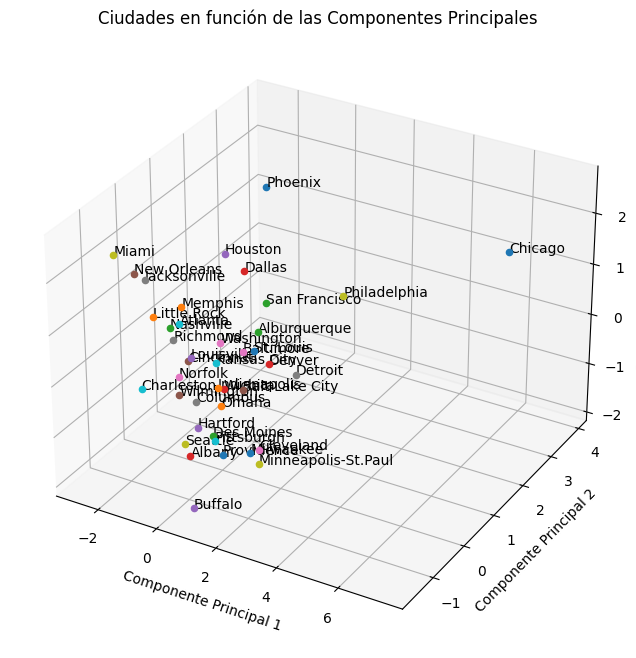

Tabla de relación entre componentes principales y variables originales:
                             SO2  Neg.Temp  Empresas  Poblacion    Viento  \
Componente Principal 1  0.489699 -0.315371  0.541169   0.487588  0.249875   
Componente Principal 2 -0.084576  0.088638  0.225881   0.282004 -0.055471   
Componente Principal 3  0.014350  0.677136  0.267159   0.344838 -0.311265   

                          Precip      Dias  
Componente Principal 1  0.000187  0.260179  
Componente Principal 2 -0.625879 -0.677967  
Componente Principal 3  0.492036 -0.109579  


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar los datos
data = pd.read_csv('/content/USA.csv',sep=';')

# Separar las características de la variable objetivo
X = data.drop(data.columns[0], axis=1)  # Eliminamos la primera columna que contiene los nombres de las ciudades
y = data.iloc[:, 0]  # Tomamos la primera columna como la variable objetivo (nombres de las ciudades)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA con un umbral del 80%
pca = PCA(0.8)
X_pca = pca.fit_transform(X_scaled)

# Graficar las ciudades en función de las componentes principales obtenidas
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, city in enumerate(y):
    ax.scatter(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2])
    ax.text(X_pca[i, 0], X_pca[i, 1], X_pca[i, 2], city)

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')
ax.set_title('Ciudades en función de las Componentes Principales')
plt.show()

# Crear tabla de relación entre componentes principales y variables originales
components = ['Componente Principal ' + str(i+1) for i in range(len(pca.components_))]
variables = X.columns.tolist()

tabla_componentes = pd.DataFrame(data=pca.components_, columns=variables, index=components)
print("Tabla de relación entre componentes principales y variables originales:")
print(tabla_componentes)

